In [ ]:
# pip install --upgrade diffusers[torch]
# pip install transformers

In [2]:
from diffusers import StableDiffusionPipeline
import torch
import random

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

In [6]:
%%time

seed = random.randint(0, 1e6)
generator = torch.Generator(device).manual_seed(seed)
prompt = "high-quality illustration of an astronaut on horseback racing across a vast, windswept desert on Mars towards a distant, glowing object in the sky."
images = pipe(
    prompt,
    num_inference_steps=100,
    guidance_scale=7.5,
    num_images_per_prompt=4,
    generator=generator
).images

print(seed)
# image
# image.save("astronaut_rides_horse.png")

  0%|          | 0/100 [00:00<?, ?it/s]

CPU times: user 8.1 s, sys: 17.4 s, total: 25.5 s
Wall time: 23.4 s


In [9]:
%%time

samples = 4
seeds = []
images = []

for i in range(samples):
    seed = random.randint(0, 1e6)
    generator = torch.Generator(device).manual_seed(seed)
    prompt = "high-quality illustration of an astronaut on horseback racing across a vast, windswept desert on Mars towards a distant, glowing object in the sky."
    image = pipe(
        prompt,
        num_inference_steps=100,
        guidance_scale=7.5,
        num_images_per_prompt=1,
        generator=generator
    ).images[0]

    images.append(image)
    seeds.append(seed)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

CPU times: user 20.1 s, sys: 16.2 s, total: 36.3 s
Wall time: 30.8 s


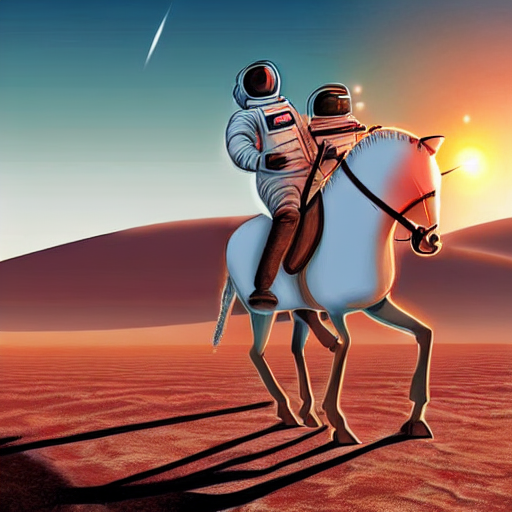

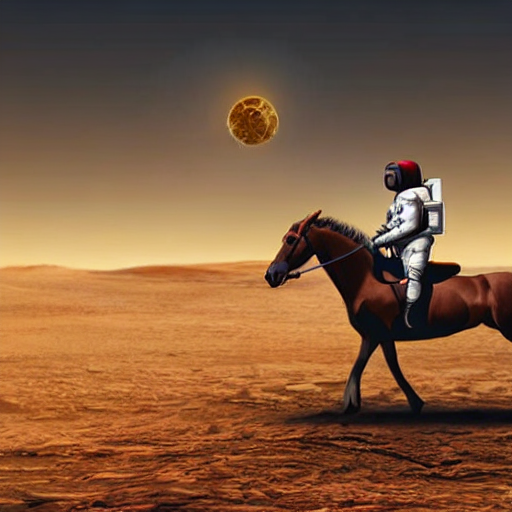

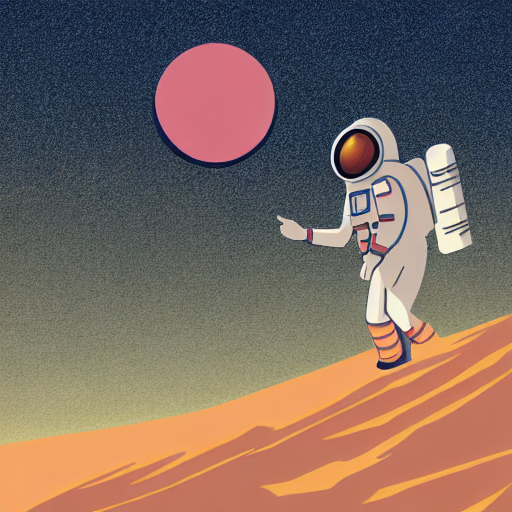

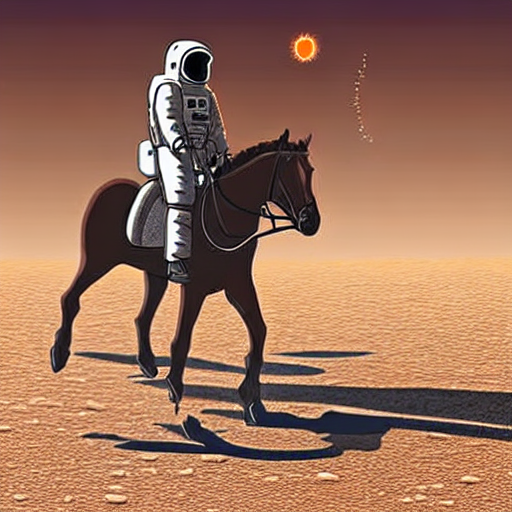

In [10]:
for image in images:
    display(image)

In [25]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

model_id = "stabilityai/stable-diffusion-2-1-base"

scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
# pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

In [28]:
seed = random.randint(0, 1e6)
generator = torch.Generator(device).manual_seed(seed)
prompt = "An astronaut on horseback on Mars, high-quality, sony alpha, close-up"
images = pipe(
    prompt,
    num_inference_steps=100,
    guidance_scale=7.5,
    num_images_per_prompt=4,
    generator=generator
).images
    
# image.save("astronaut_rides_horse.png")

  0%|          | 0/100 [00:00<?, ?it/s]

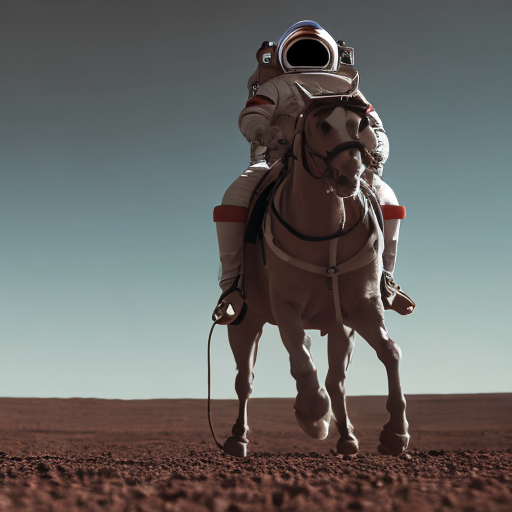

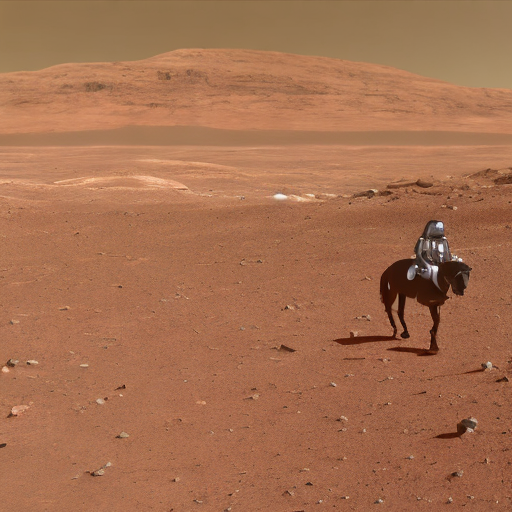

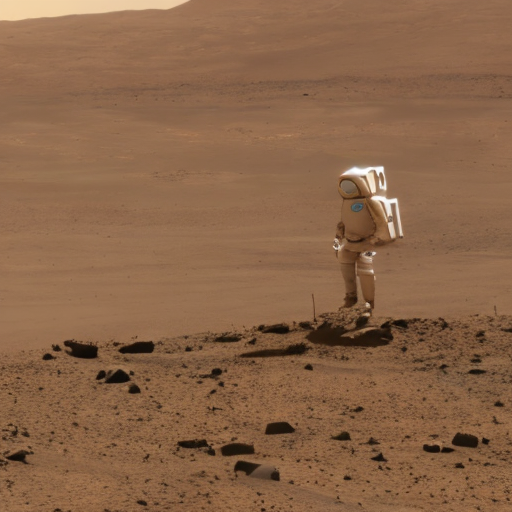

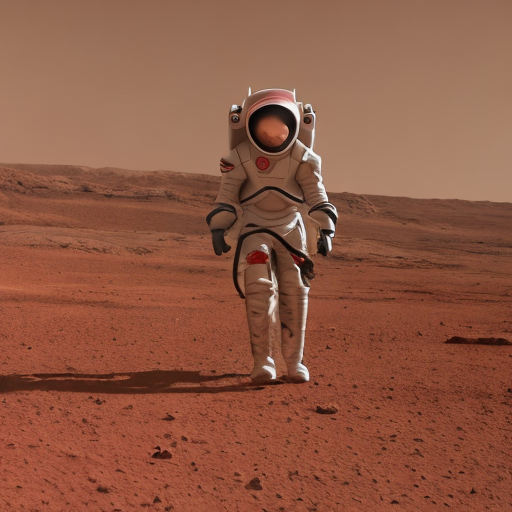

In [29]:
for image in images:
    display(image)